# Partie 1

In [1]:
# Importer les librairies
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # pour ecouter le son
import os
import sys
import warnings
# ignorer les avertissements de type deprecation
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

TESS = "/home/vm/kaggle/input/TESS/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV = "/home/vm/kaggle/input/RAVDESS/audio_speech_actors_01-24/"
SAVEE = "/home/vm/kaggle/input/SAVEE/ALL/"
CREMA = "/home/vm/kaggle/input/CREMA-D/AudioWAV/"

# tester un example 
dir_list = os.listdir(SAVEE)
dir_list[0:5]

['DC_d13.wav', 'KL_h03.wav', 'KL_n15.wav', 'DC_f07.wav', 'JE_h03.wav']

In [3]:
# parser le nom du fichier pour avoir les emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)
    
# verifier le nombre de donnés associé à chaque label 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_surprise     60
male_angry        60
male_happy        60
male_disgust      60
male_fear         60
male_sad          60
Name: labels, dtype: int64

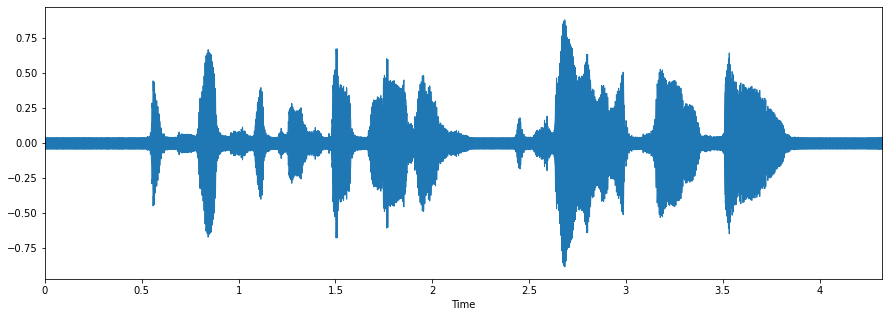

In [4]:
# On utilise la librairie Librosa
fname = SAVEE + 'DC_f11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Un exemple audio
ipd.Audio(fname)

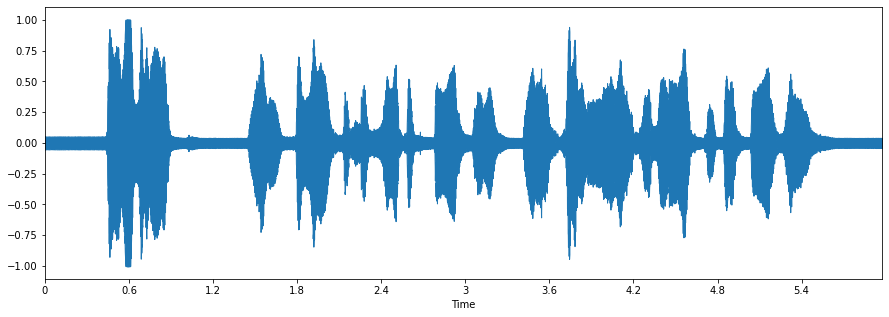

In [5]:
# On essaye avec une piste d'une personne hereuse 
fname = SAVEE + 'DC_h11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Jouer la piste audio
ipd.Audio(fname)

In [6]:
#RAVDESS
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
female_fear         96
female_happy        96
female_angry        96
male_fear           96
male_sad            96
male_surprise       96
male_happy          96
female_surprise     96
female_sad          96
male_angry          96
male_disgust        96
female_disgust      96
Name: labels, dtype: int64

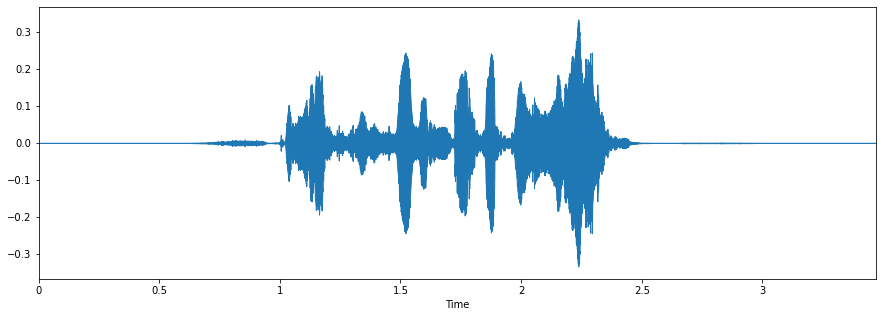

In [7]:
# On choisit une piste d'une personne qui a peur
fname = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Jouer la piste audio
ipd.Audio(fname)

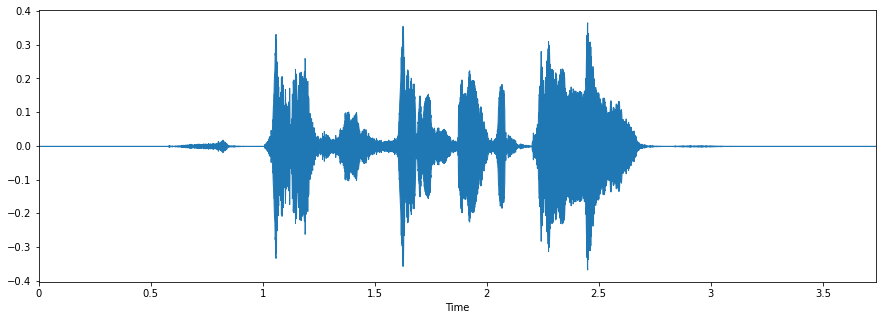

In [8]:
# On choisit une piste d'une personne hereuse 
fname = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Jouer la piste audio
ipd.Audio(fname)

In [9]:
#TESS
#Les emotions sont deja organisés sur plusieurs dossiers
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [10]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_fear        400
female_angry       400
female_neutral     400
female_sad         400
female_surprise    400
female_happy       400
female_disgust     400
Name: labels, dtype: int64

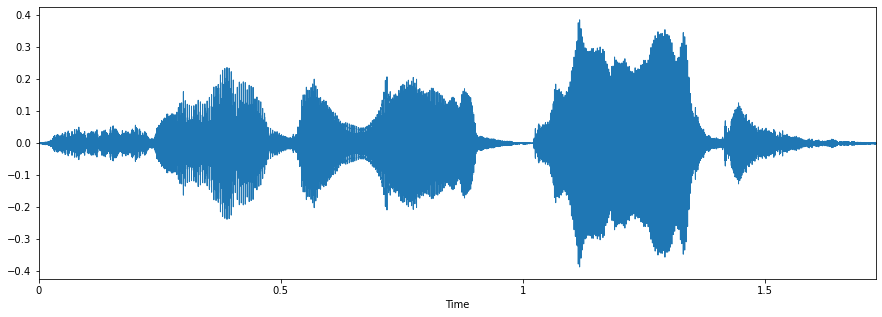

In [11]:
# On choisit une piste d'une personne qui a peur
fname = TESS + 'YAF_fear/YAF_dog_fear.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Jouer la piste audio
ipd.Audio(fname)

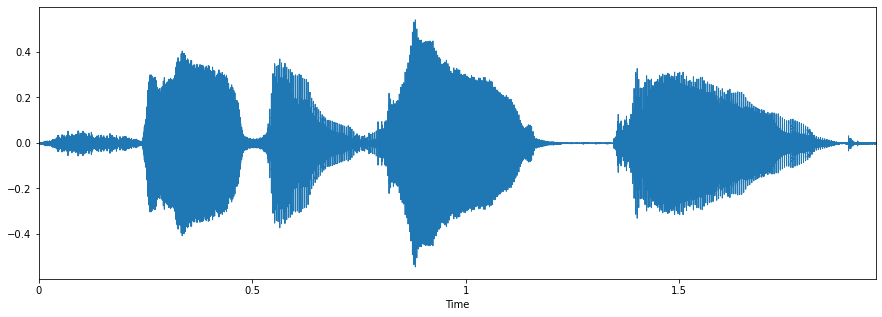

In [12]:
# On choisit une piste d'une personne heureuse
fname =  TESS + 'YAF_happy/YAF_dog_happy.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Jouer la piste audio
ipd.Audio(fname)

In [13]:
#CREMA-D dataset
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [14]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

male_fear         671
male_happy        671
male_disgust      671
male_sad          671
male_angry        671
female_fear       600
female_happy      600
female_angry      600
female_sad        600
female_disgust    600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

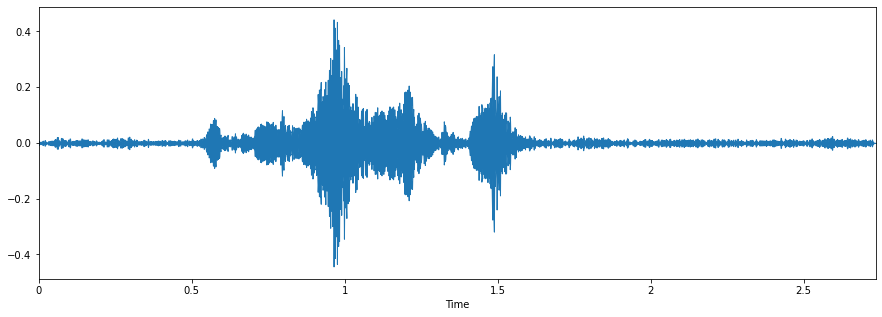

In [15]:
# Toujours en utilisant Libosa on va essayer d'abord de voir le résultat avec une piste d'une personne heureuse 
fname = CREMA + '1012_IEO_HAP_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Jouer la piste audio
ipd.Audio(fname)

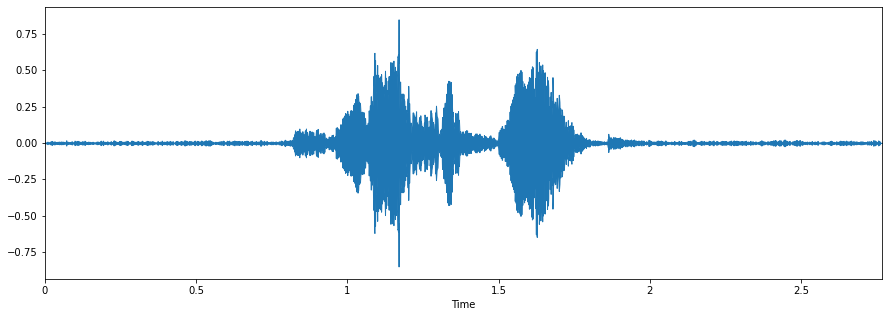

In [16]:
# Une piste d'une personne qui a peur
fname = CREMA + '1012_IEO_FEA_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Jouer la piste audio
ipd.Audio(fname)

In [17]:
df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

female_angry       1096
female_sad         1096
female_disgust     1096
female_fear        1096
female_happy       1096
female_neutral     1056
male_neutral        839
male_happy          827
male_fear           827
male_disgust        827
male_sad            827
male_angry          827
female_surprise     496
male_surprise       156
Name: labels, dtype: int64


# Partie 2

In [18]:
# Importer les librairies
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import os
import IPython.display as ipd  # Jouer du son sur notebook


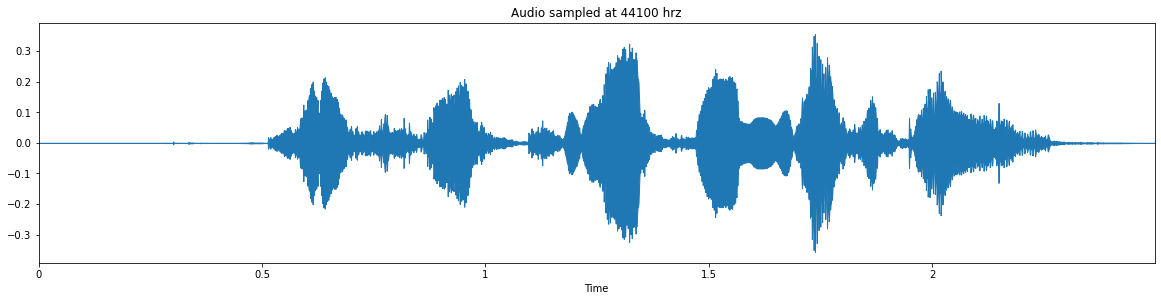

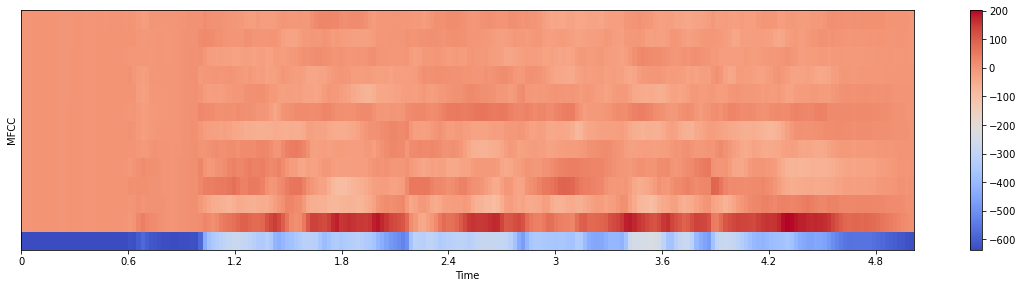

In [19]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "/home/vm/kaggle/input/RAVDESS/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

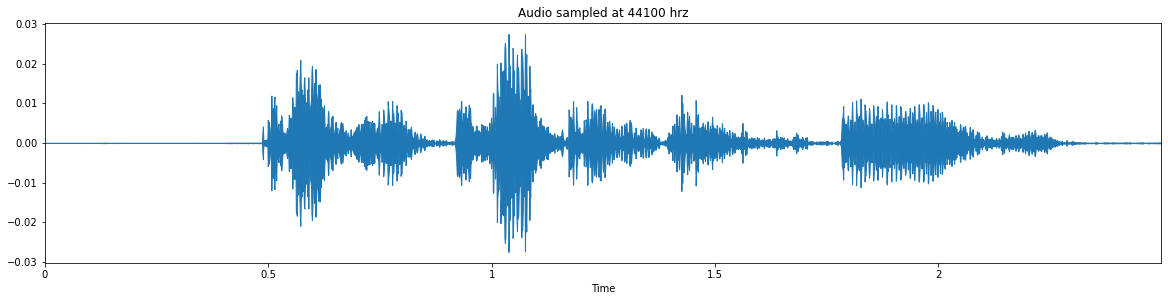

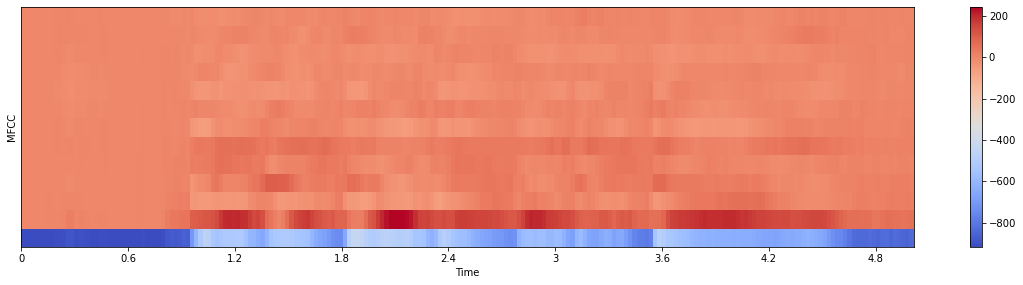

In [20]:
# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "/home/main/kaggle/input/RAVDESS/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

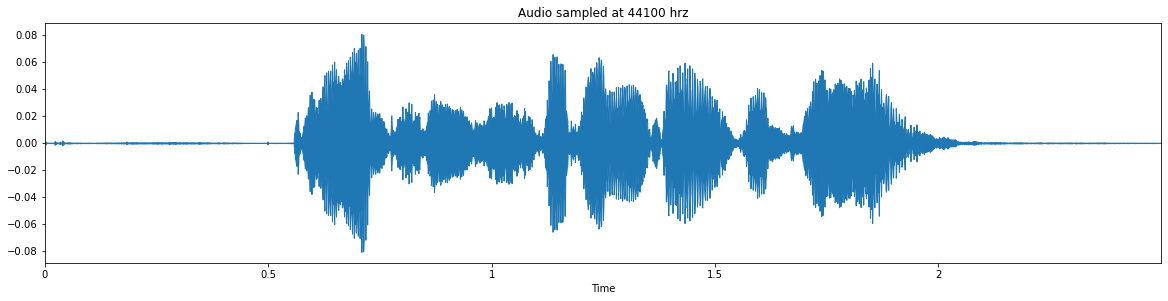

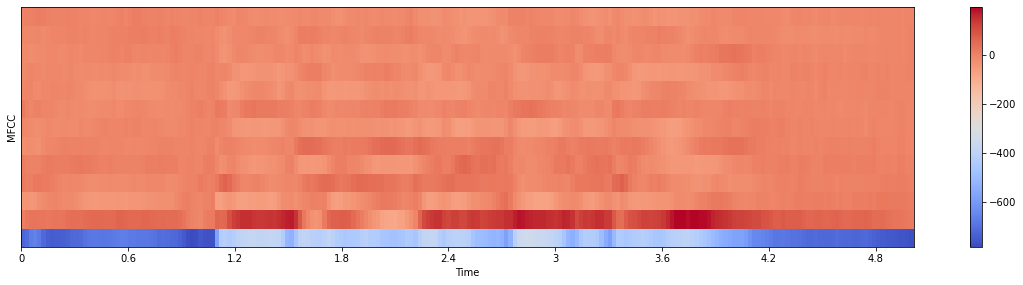

In [20]:
# Source - RAVDESS; Gender - Female; Emotion - Happy 
path = "/home/vm/kaggle/input/RAVDESS/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

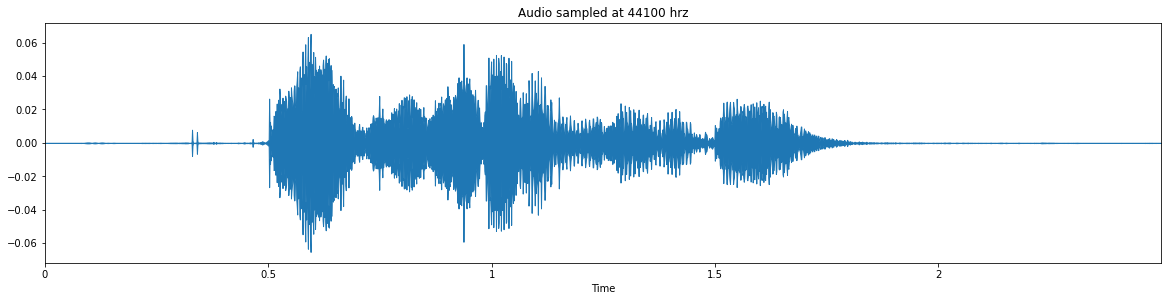

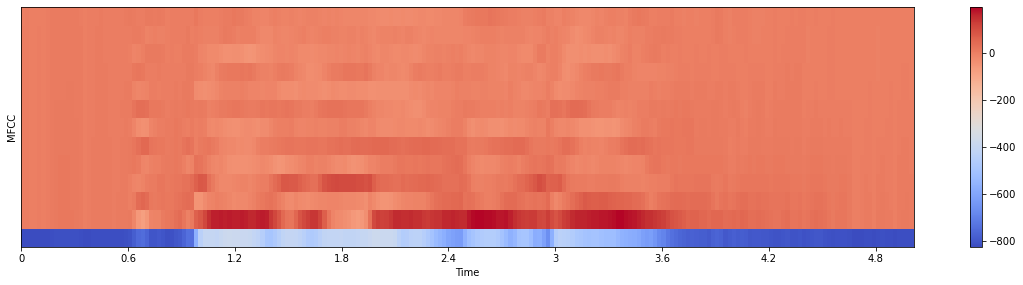

In [21]:
# Source - RAVDESS; Gender - Male; Emotion - Happy 
path = "/home/vm/kaggle/input/RAVDESS/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

216
216


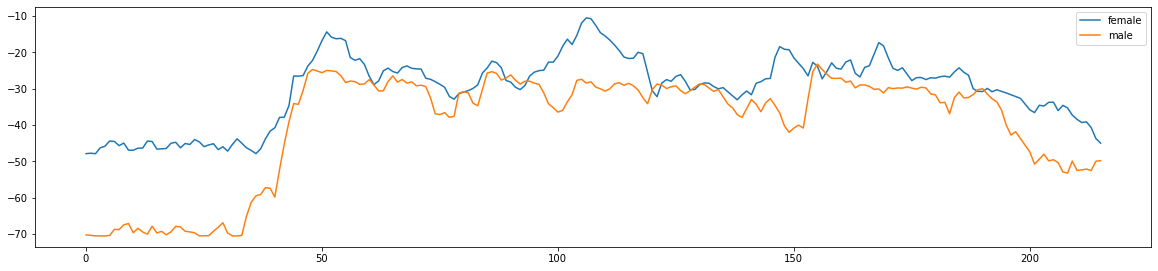

In [23]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "/home/vm/kaggle/input/RAVDESS/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "/home/vm/kaggle/input/RAVDESS/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

216
216


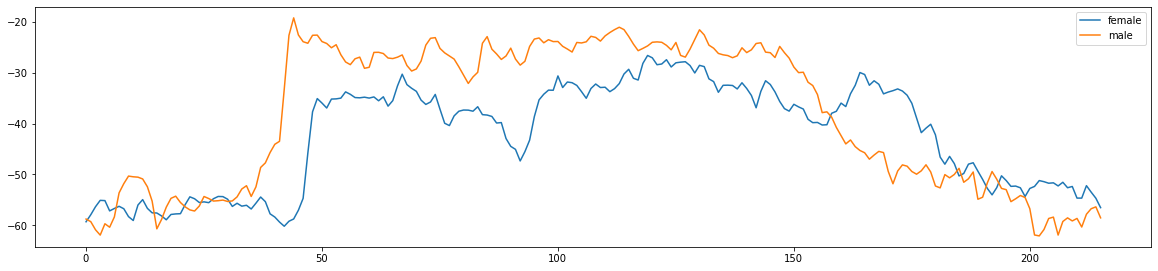

In [24]:
# Source - RAVDESS; Gender - Female; Emotion - happy 
path = "/home/vm/kaggle/input/RAVDESS/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - happy 
path = "/home/vm/kaggle/input/RAVDESS/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

# Partie 3

In [25]:
# Importer les librairies nécessaires
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd  # pour jouer du son sur notebook


In [27]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("/home/vm/kaggle/input/data-path/Data_path.csv")
ref.head()

labels source                                        path
0  male_disgust  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/DC_d13.wav
1    male_happy  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/KL_h03.wav
2  male_neutral  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/KL_n15.wav
3     male_fear  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/DC_f07.wav
4    male_happy  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/JE_h03.wav

In [28]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets 
df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

12162


feature
0  [-26.134151, -23.928139, -23.992998, -23.68722...
1  [-23.99426, -25.286518, -27.800602, -30.800474...
2  [-33.75329, -33.97641, -33.643047, -31.652178,...
3  [-13.442276, -8.020596, -5.986821, -6.3737206,...
4  [-28.520926, -26.120321, -26.568174, -26.99586...

In [29]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

labels source                                        path          0  \
0  male_disgust  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/DC_d13.wav -26.134151   
1    male_happy  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/KL_h03.wav -23.994261   
2  male_neutral  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/KL_n15.wav -33.753288   
3     male_fear  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/DC_f07.wav -13.442276   
4    male_happy  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/JE_h03.wav -28.520926   

           1          2          3          4          5          6  ...  \
0 -23.928139 -23.992998 -23.687227 -26.934286 -24.934038 -23.083403  ...   
1 -25.286518 -27.800602 -30.800474 -35.243141 -35.777966 -34.927986  ...   
2 -33.976410 -33.643047 -31.652178 -31.810314 -33.137383 -29.100904  ...   
3  -8.020596  -5.986821  -6.373721  -5.190186  -4.239275  -3.880403  ...   
4 -26.120321 -26.568174 -26.995867 -26.450247 -26.345964 -26.882969  ...   

         206        207        208        209        210        211  \
0 -12.367324 -10.398124  -9.959909 -11.010427 -10.773851 -11.549667   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2 -24.303049 -24.424141 -24.680439 -24.308041 -23.674480 -25.257154   
3 -11.022025 -10.693925 -10.625395 -10.843586 -10.529749  -9.981356   
4        NaN        NaN        NaN        NaN        NaN        NaN   

         212        213        214        215  
0 -11.601619 -11.787998  -8.063621  -4.384247  
1        NaN        NaN        NaN        NaN  
2 -27.500721 -31.035299 -32.458927 -35.084789  
3 -10.076420  -9.949388  -4.860996  -0.177098  
4        NaN        NaN        NaN        NaN  

[5 rows x 219 columns]

In [30]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(12162, 219)


labels source                                        path          0  \
0  male_disgust  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/DC_d13.wav -26.134151   
1    male_happy  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/KL_h03.wav -23.994261   
2  male_neutral  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/KL_n15.wav -33.753288   
3     male_fear  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/DC_f07.wav -13.442276   
4    male_happy  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/JE_h03.wav -28.520926   

           1          2          3          4          5          6  ...  \
0 -23.928139 -23.992998 -23.687227 -26.934286 -24.934038 -23.083403  ...   
1 -25.286518 -27.800602 -30.800474 -35.243141 -35.777966 -34.927986  ...   
2 -33.976410 -33.643047 -31.652178 -31.810314 -33.137383 -29.100904  ...   
3  -8.020596  -5.986821  -6.373721  -5.190186  -4.239275  -3.880403  ...   
4 -26.120321 -26.568174 -26.995867 -26.450247 -26.345964 -26.882969  ...   

         206        207        208        209        210        211  \
0 -12.367324 -10.398124  -9.959909 -11.010427 -10.773851 -11.549667   
1   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2 -24.303049 -24.424141 -24.680439 -24.308041 -23.674480 -25.257154   
3 -11.022025 -10.693925 -10.625395 -10.843586 -10.529749  -9.981356   
4   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

         212        213        214        215  
0 -11.601619 -11.787998  -8.063621  -4.384247  
1   0.000000   0.000000   0.000000   0.000000  
2 -27.500721 -31.035299 -32.458927 -35.084789  
3 -10.076420  -9.949388  -4.860996  -0.177098  
4   0.000000   0.000000   0.000000   0.000000  

[5 rows x 219 columns]

In [31]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

0          1          2          3          4          5    \
4950  -18.611181 -17.616537 -18.411484 -18.987421 -17.404621 -16.747272   
3860  -16.244083 -19.706165 -27.480320 -27.228676 -22.218975 -20.421070   
9761   -1.533947  -4.030604  -9.614023 -12.045173  -9.992991 -11.926252   
7620   -4.531077  -3.933794  -4.567834  -5.871509  -5.282473  -6.490458   
11586 -20.621702 -21.587507 -20.563650 -20.703461 -21.205717 -18.608528   
7914  -17.514992 -18.551868 -17.043013 -16.977903 -19.369631 -19.562130   
9513  -18.740368 -18.824932 -16.149492 -16.963455 -18.229977 -18.183958   
5835  -19.066851 -18.328384 -17.710285 -18.043194 -18.252481 -18.710625   
5389  -20.760590 -20.047142 -18.961346 -19.468687 -19.316296 -18.162565   
11222 -18.252928 -17.727369 -19.222475 -18.469973 -17.572329 -17.850544   

             6          7          8          9    ...        206        207  \
4950  -17.733747 -18.055027 -17.931210 -15.913171  ... -22.899401 -21.647814   
3860  -22.902065 -24.595947 -25.853359 -29.487854  ...   0.000000   0.000000   
9761  -14.008467 -13.561554 -14.024568 -15.151946  ...   0.000000   0.000000   
7620   -8.156468  -9.188803  -8.681728  -8.212411  ...   0.000000   0.000000   
11586 -18.446669 -16.211845 -14.257653 -15.160404  ...   0.000000   0.000000   
7914  -22.008749 -20.178379 -17.989597 -19.336285  ...   0.000000   0.000000   
9513  -19.274342 -18.395124 -16.951286 -16.672031  ... -17.882132 -19.390709   
5835  -16.626354 -17.831005 -18.028343 -17.859106  ...   0.000000   0.000000   
5389  -18.102333 -19.914131 -20.931385 -19.215496  ...   0.000000   0.000000   
11222 -17.932026 -20.588900 -18.612183 -15.990725  ... -18.065437 -18.135094   

             208        209        210        211        212        213  \
4950  -19.758650 -18.879402 -19.397379 -20.171659 -22.689241 -24.612816   
3860    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
9761    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
7620    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
11586   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
7914    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
9513  -17.779474 -19.165974   0.000000   0.000000   0.000000   0.000000   
5835    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
5389    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
11222 -19.665306 -20.741903 -20.273033 -18.371031 -15.576723 -17.512487   

             214        215  
4950  -24.153774 -22.703135  
3860    0.000000   0.000000  
9761    0.000000   0.000000  
7620    0.000000   0.000000  
11586   0.000000   0.000000  
7914    0.000000   0.000000  
9513    0.000000   0.000000  
5835    0.000000   0.000000  
5389    0.000000   0.000000  
11222 -17.008549 -18.195284  

[10 rows x 216 columns]

In [32]:
# Lts do data normalization 
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]


0         1         2         3         4         5         6    \
4950   0.182999  0.300139  0.438194  0.388978  0.498774  0.542671  0.461281   
3860   0.348022  0.148464 -0.235110 -0.221709  0.142624  0.271088  0.080072   
9761   1.373540  1.286273  1.091351  0.903407  1.047062  0.899060  0.736053   
7620   1.164595  1.293300  1.465998  1.360883  1.395530  1.300897  1.167690   
11586  0.042836  0.011907  0.278410  0.261817  0.217582  0.405079  0.408697   
7914   0.259420  0.232248  0.539795  0.537886  0.353409  0.334585  0.145962   
9513   0.173993  0.212428  0.606133  0.538956  0.437717  0.436465  0.347649   
5835   0.151232  0.248470  0.490254  0.458946  0.436052  0.397531  0.542961   
5389   0.033153  0.123714  0.397371  0.353316  0.357355  0.438046  0.434095   
11222  0.207975  0.292094  0.377983  0.427322  0.486368  0.461112  0.446656   

            7         8         9    ...       206       207       208  \
4950   0.432457  0.435668  0.581301  ... -0.878121 -0.809937 -0.690560   
3860  -0.049224 -0.147536 -0.418023  ...  0.540733  0.526940  0.526356   
9761   0.763362  0.723263  0.637340  ...  0.540733  0.526940  0.526356   
7620   1.085377  1.116586  1.148206  ...  0.540733  0.526940  0.526356   
11586  0.568191  0.706104  0.636717  ...  0.540733  0.526940  0.526356   
7914   0.276091  0.431370  0.329303  ...  0.540733  0.526940  0.526356   
9513   0.407412  0.507807  0.525436  ... -0.567250 -0.670547 -0.568664   
5835   0.448954  0.428518  0.438048  ...  0.540733  0.526940  0.526356   
5389   0.295550  0.214805  0.338195  ...  0.540733  0.526940  0.526356   
11222  0.245860  0.385537  0.575592  ... -0.578607 -0.593006 -0.684811   

            209       210       211       212       213       214       215  
4950  -0.629325 -0.675244 -0.718064 -0.861335 -0.984906 -0.969150 -0.878522  
3860   0.527000  0.512129  0.512025  0.512817  0.501174  0.496129  0.491843  
9761   0.527000  0.512129  0.512025  0.512817  0.501174  0.496129  0.491843  
7620   0.527000  0.512129  0.512025  0.512817  0.501174  0.496129  0.491843  
11586  0.527000  0.512129  0.512025  0.512817  0.501174  0.496129  0.491843  
7914   0.527000  0.512129  0.512025  0.512817  0.501174  0.496129  0.491843  
9513  -0.646877  0.512129  0.512025  0.512817  0.501174  0.496129  0.491843  
5835   0.527000  0.512129  0.512025  0.512817  0.501174  0.496129  0.491843  
5389   0.527000  0.512129  0.512025  0.512817  0.501174  0.496129  0.491843  
11222 -0.743400 -0.728846 -0.608260 -0.430572 -0.556200 -0.535687 -0.606427  

[10 rows x 216 columns]

In [33]:
# Lets do some preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(9121, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [34]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(9121, 216, 1)

In [35]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 216, 256)          2304      
_________________________________________________________________
activation (Activation)      (None, 216, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization (BatchNo (None, 216, 256)          1024      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
dropout (Dropout)            (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27, 256)           0

In [36]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
571/571 [==============================] - 51s 90ms/step - loss: 2.4196 - accuracy: 0.1921 - val_loss: 2.4542 - val_accuracy: 0.1943
Epoch 2/100
571/571 [==============================] - 55s 97ms/step - loss: 2.1836 - accuracy: 0.2627 - val_loss: 2.2292 - val_accuracy: 0.2634
Epoch 3/100
571/571 [==============================] - 51s 90ms/step - loss: 2.0775 - accuracy: 0.2955 - val_loss: 2.1625 - val_accuracy: 0.2864
Epoch 4/100
571/571 [==============================] - 51s 90ms/step - loss: 2.0022 - accuracy: 0.3254 - val_loss: 2.0815 - val_accuracy: 0.3377
Epoch 5/100
571/571 [==============================] - 53s 93ms/step - loss: 1.9398 - accuracy: 0.3427 - val_loss: 2.0404 - val_accuracy: 0.3509
Epoch 6/100
571/571 [==============================] - 51s 89ms/step - loss: 1.8944 - accuracy: 0.3563 - val_loss: 1.9969 - val_accuracy: 0.3542
Epoch 7/100
571/571 [==============================] - 50s 88ms/step - loss: 1.8502 - accuracy: 0.3733 - val_loss: 1.9519 - val_ac

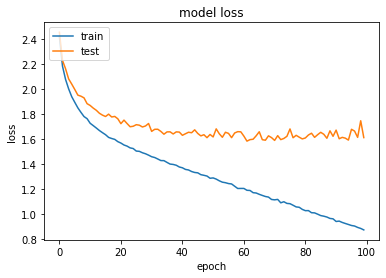

In [37]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
# Save model and weights
model_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /home/vm/kaggle/saved_models/Emotion_Model.h5 


In [39]:
# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 43.37%


In [40]:
preds = loaded_model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

191/191 [==============================] - 6s 29ms/step


array([ 4,  3,  7, ..., 12,  4,  0])

In [41]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[170:180]


actualvalues predictedvalues
170        male_sad  female_disgust
171  female_neutral      female_sad
172      male_angry    female_angry
173  female_disgust  female_disgust
174      male_angry      male_angry
175     female_fear     female_fear
176      male_angry      male_angry
177     female_fear    male_neutral
178    female_happy    female_happy
179  female_neutral      female_sad

In [42]:
# Write out the predictions to disk
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

actualvalues
predictedvalues              
female_angry              437
female_disgust            307
female_fear               402
female_happy              290
female_neutral            233
female_sad                358
female_surprise           144
male_angry                219
male_disgust               76
male_fear                 186
male_happy                107
male_neutral              140
male_sad                   94
male_surprise              48

In [43]:
# the confusion matrix heat map plot
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gender recode function
def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'


0.4337389016770799


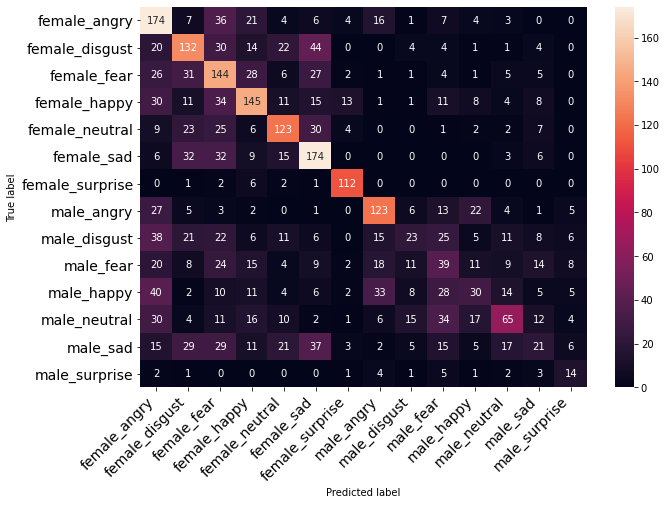

In [44]:
# Get the predictions file 
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)


In [45]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.40      0.61      0.48       283
 female_disgust       0.43      0.48      0.45       276
    female_fear       0.36      0.51      0.42       281
   female_happy       0.50      0.50      0.50       292
 female_neutral       0.53      0.53      0.53       232
     female_sad       0.49      0.63      0.55       277
female_surprise       0.78      0.90      0.84       124
     male_angry       0.56      0.58      0.57       212
   male_disgust       0.30      0.12      0.17       197
      male_fear       0.21      0.20      0.21       192
     male_happy       0.28      0.15      0.20       198
   male_neutral       0.46      0.29      0.35       227
       male_sad       0.22      0.10      0.14       216
  male_surprise       0.29      0.41      0.34        34

       accuracy                           0.43      3041
      macro avg       0.42      0.43      0.41      3041
   weighted avg       0.42   

0.7902005919105557


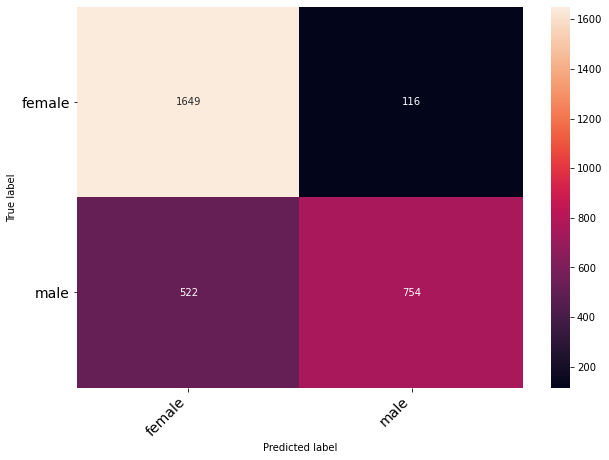

In [46]:
modidf = finaldf
modidf['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [47]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))


              precision    recall  f1-score   support

      female       0.76      0.93      0.84      1765
        male       0.87      0.59      0.70      1276

    accuracy                           0.79      3041
   macro avg       0.81      0.76      0.77      3041
weighted avg       0.80      0.79      0.78      3041



0.4899704044722131


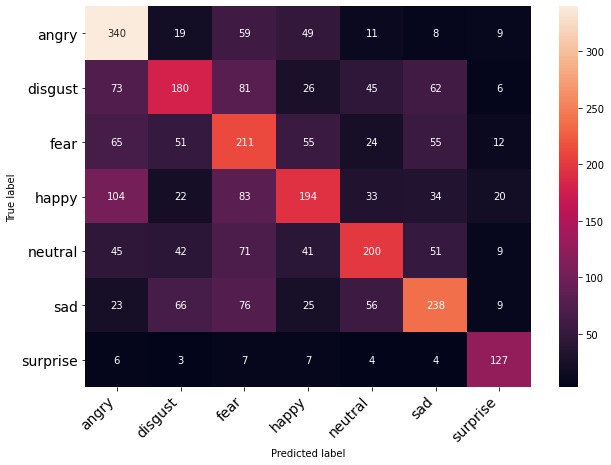

In [48]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique() 
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [49]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.52      0.69      0.59       495
     disgust       0.47      0.38      0.42       473
        fear       0.36      0.45      0.40       473
       happy       0.49      0.40      0.44       490
     neutral       0.54      0.44      0.48       459
         sad       0.53      0.48      0.50       493
    surprise       0.66      0.80      0.73       158

    accuracy                           0.49      3041
   macro avg       0.51      0.52      0.51      3041
weighted avg       0.49      0.49      0.49      3041



# Partie 4

In [1]:
# Importing required libraries 
from keras.models import Sequential, Model, model_from_json
import matplotlib.pyplot as plt
import keras 
import pickle
import wave  # !pip install wave
import os
import pandas as pd
import numpy as np
import sys
import warnings
import librosa
import librosa.display
import IPython.display as ipd  # To play sound in the notebook
import pyaudio
import tensorflow as tf




In [2]:
CHUNK = 1024 
FORMAT = pyaudio.paInt16 
CHANNELS = 2 
RATE = 44100 
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "test-enregistrement.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


In [3]:
data, sampling_rate = librosa.load('/home/vm/kaggle/input/happy_audio/Liza-happy-v3.wav')
ipd.Audio('/home/vm//kaggle/input/happy_audio/Liza-happy-v3.wav')


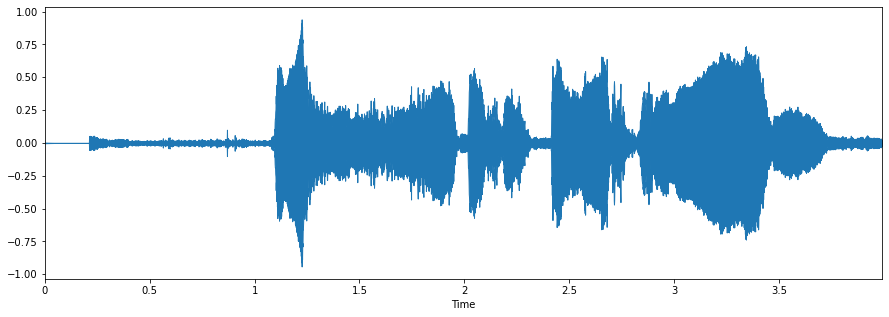

In [4]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)


In [5]:
# loading json and model architecture 
json_file = open('/home/vm//kaggle/input/saved-model/model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/home/vm//kaggle/input/saved-model/Emotion_Model.h5")
print("Loaded model from disk")

# the optimiser
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Loaded model from disk


In [6]:
# Lets transform the dataset so we can apply the predictions
X, sample_rate = librosa.load('/home/vm/kaggle/input/happy_audio/Liza-happy-v3.wav'
                              ,res_type='kaiser_fast'
                              ,duration=2.5
                              ,sr=44100
                              ,offset=0.5
                             )

sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
newdf = pd.DataFrame(data=mfccs).T
newdf



0          1          2          3          4          5    \
0 -19.610844 -19.114281 -18.636919 -18.416622 -17.367428 -16.672792   

         6          7          8          9    ...        206       207  \
0 -16.505274 -16.104017 -14.565969 -13.780432  ... -13.323785 -14.06687   

         208        209        210        211        212        213       214  \
0 -13.496387 -15.001275 -14.980046 -14.926601 -15.364695 -13.737248 -8.044723   

        215  
0 -3.179077  

[1 rows x 216 columns]

In [7]:
# Apply predictions
newdf= np.expand_dims(newdf, axis=2)
newpred = loaded_model.predict(newdf, 
                         batch_size=16, 
                         verbose=1)

newpred

1/1 [==============================] - 0s 777us/step


array([[2.94665057e-07, 2.89181834e-09, 1.99035048e-06, 1.05972883e-10,
        9.99056510e-07, 3.52347046e-01, 6.47649348e-01, 1.08369495e-22,
        2.43317177e-14, 1.01396296e-16, 8.01316038e-16, 8.64154615e-09,
        3.25720009e-07, 3.74546450e-15]], dtype=float32)

In [8]:
filename = '/home/vm/kaggle/input/labels/labels'
infile = open(filename,'rb')
lb = pickle.load(infile)
infile.close()

# Get the final predicted label
final = newpred.argmax(axis=1)
final = final.astype(int).flatten()
final = (lb.inverse_transform((final)))
print(final) #emo(final) #gender(final) 

['female_surprise']


# Partie 5

In [1]:
# Importing required libraries 
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
from tqdm import tqdm
import pickle
import IPython.display as ipd  # To play sound in the notebook




In [2]:
#########################
# Augmentation methods
#########################
def noise(data):
    """
    Adding White Noise.
    """
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.05*np.random.uniform()*np.amax(data)   # more noise reduce the value to 0.5
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*1000)  #default at 500
    return np.roll(data, s_range)
    
def stretch(data, rate=0.8):
    """
    Streching the Sound. Note that this expands the dataset slightly
    """
    data = librosa.effects.time_stretch(data, rate)
    return data
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=-0.5 ,high=7)  # default low = 1.5, high = 3
    return (data * dyn_change)
    
def speedNpitch(data):
    """
    peed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.2  / length_change # try changing 1.0 to 2.0 ... =D
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

####################################
# the confusion matrix heat map plot
####################################
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

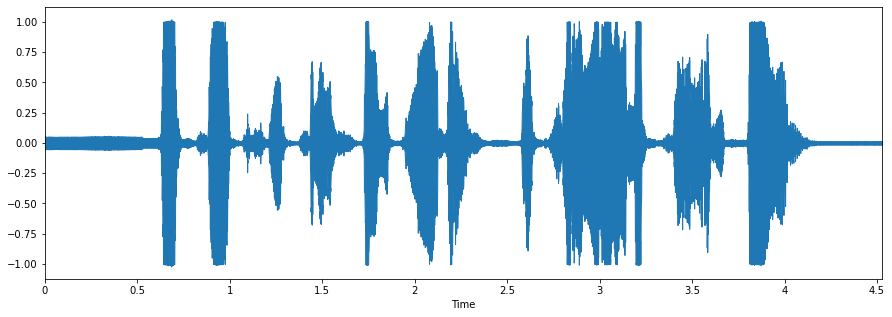

In [3]:
# Use one audio file in previous parts again
fname = '/home/vm/kaggle/input/SAVEE/ALL/JK_f11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Paly it again to refresh our memory
ipd.Audio(data, rate=sampling_rate)

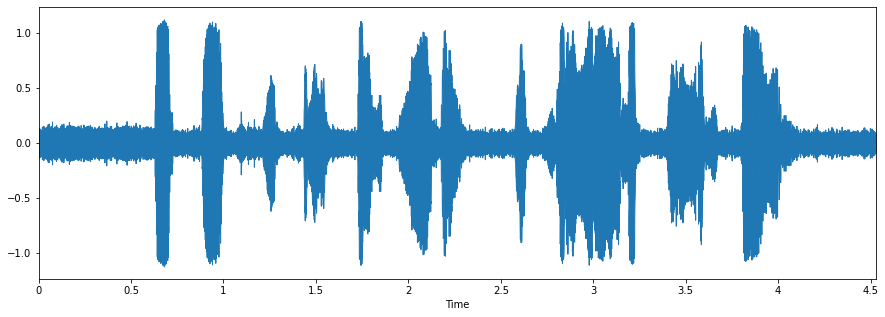

In [4]:
x = noise(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

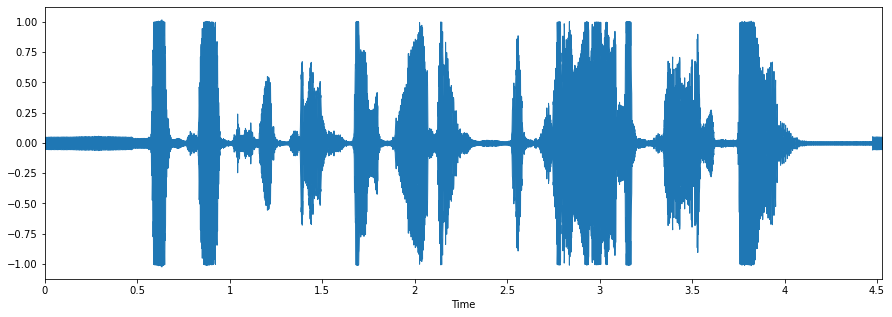

In [5]:
x = shift(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)


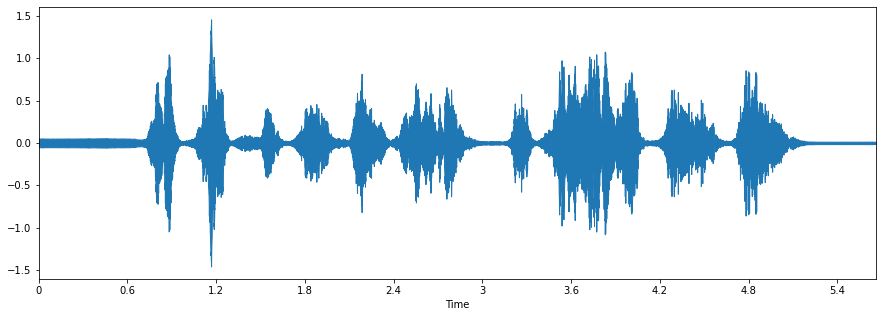

In [6]:
x = stretch(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

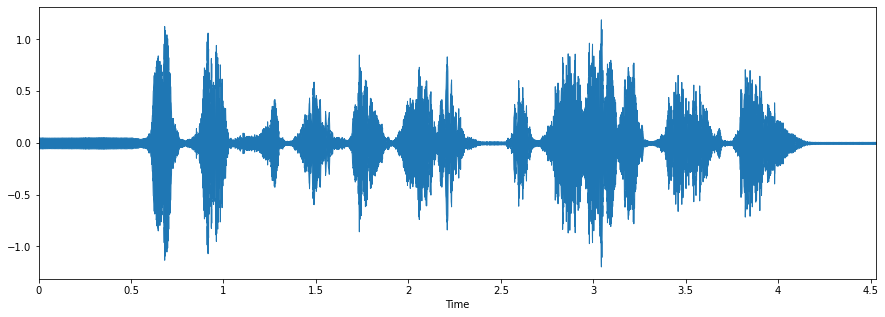

In [7]:
x = pitch(data, sampling_rate)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

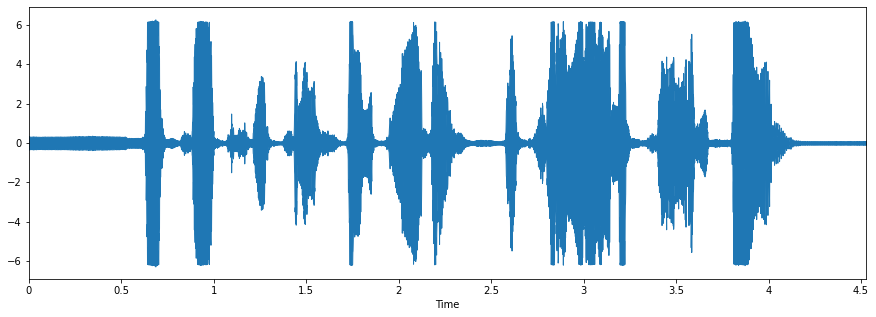

In [8]:
x = dyn_change(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

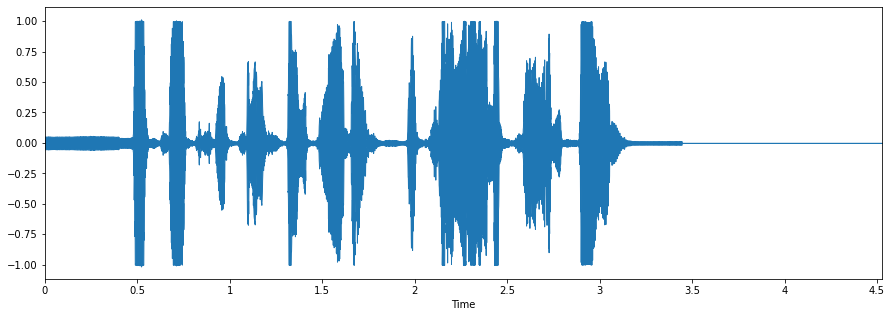

In [9]:
x = speedNpitch(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)


In [10]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("/home/vm/kaggle/input/data-path/Data_path.csv")
ref.head()


labels source                                        path
0  male_disgust  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/DC_d13.wav
1    male_happy  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/KL_h03.wav
2  male_neutral  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/KL_n15.wav
3     male_fear  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/DC_f07.wav
4    male_happy  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/JE_h03.wav

In [11]:
# Note this takes a couple of minutes (~16 mins) as we're iterating over 4 datasets, and with augmentation  
df = pd.DataFrame(columns=['feature'])
df_noise = pd.DataFrame(columns=['feature'])
df_speedpitch = pd.DataFrame(columns=['feature'])
cnt = 0

# loop feature extraction over the entire dataset
for i in tqdm(ref.path):
    
    # first load the audio 
    X, sample_rate = librosa.load(i
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )

    # take mfcc and mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=np.array(sample_rate), 
                                        n_mfcc=13),
                    axis=0)
    
    df.loc[cnt] = [mfccs]   

    # random shifting (omit for now)
    # Stretch
    # pitch (omit for now)
    # dyn change
    
    # noise 
    aug = noise(X)
    aug = np.mean(librosa.feature.mfcc(y=aug, 
                                    sr=np.array(sample_rate), 
                                    n_mfcc=13),    
                  axis=0)
    df_noise.loc[cnt] = [aug]

    # speed pitch
    aug = speedNpitch(X)
    aug = np.mean(librosa.feature.mfcc(y=aug, 
                                    sr=np.array(sample_rate), 
                                    n_mfcc=13),    
                  axis=0)
    df_speedpitch.loc[cnt] = [aug]   

    cnt += 1

df.head()

100%|██████████| 12162/12162 [12:10<00:00, 16.64it/s]


feature
0  [-26.134151, -23.928139, -23.992998, -23.68722...
1  [-23.99426, -25.286518, -27.800602, -30.800474...
2  [-33.75329, -33.97641, -33.643047, -31.652178,...
3  [-13.442276, -8.020596, -5.986821, -6.3737206,...
4  [-28.520926, -26.120321, -26.568174, -26.99586...

In [12]:
# combine 
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df_noise = pd.concat([ref,pd.DataFrame(df_noise['feature'].values.tolist())],axis=1)
df_speedpitch = pd.concat([ref,pd.DataFrame(df_speedpitch['feature'].values.tolist())],axis=1)
print(df.shape,df_noise.shape,df_speedpitch.shape)

(12162, 219) (12162, 219) (12162, 219)


In [13]:
df = pd.concat([df,df_noise,df_speedpitch],axis=0,sort=False)
df=df.fillna(0)
del df_noise, df_speedpitch

df.head()


labels source                                        path          0  \
0  male_disgust  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/DC_d13.wav -26.134151   
1    male_happy  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/KL_h03.wav -23.994261   
2  male_neutral  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/KL_n15.wav -33.753288   
3     male_fear  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/DC_f07.wav -13.442276   
4    male_happy  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/JE_h03.wav -28.520926   

           1          2          3          4          5          6  ...  \
0 -23.928139 -23.992998 -23.687227 -26.934286 -24.934038 -23.083403  ...   
1 -25.286518 -27.800602 -30.800474 -35.243141 -35.777966 -34.927986  ...   
2 -33.976410 -33.643047 -31.652178 -31.810314 -33.137383 -29.100904  ...   
3  -8.020596  -5.986821  -6.373721  -5.190186  -4.239275  -3.880403  ...   
4 -26.120321 -26.568174 -26.995867 -26.450247 -26.345964 -26.882969  ...   

         206        207        208        209        210        211  \
0 -12.367324 -10.398124  -9.959909 -11.010427 -10.773851 -11.549667   
1   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2 -24.303049 -24.424141 -24.680439 -24.308041 -23.674480 -25.257154   
3 -11.022025 -10.693925 -10.625395 -10.843586 -10.529749  -9.981356   
4   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

         212        213        214        215  
0 -11.601619 -11.787998  -8.063621  -4.384247  
1   0.000000   0.000000   0.000000   0.000000  
2 -27.500721 -31.035299 -32.458927 -35.084789  
3 -10.076420  -9.949388  -4.860996  -0.177098  
4   0.000000   0.000000   0.000000   0.000000  

[5 rows x 219 columns]

In [14]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

0          1          2          3          4          5    \
3857  -19.057800 -15.790862 -14.636479 -14.849304 -16.441023 -18.301743   
7298   -8.141048 -11.223326 -12.859507 -12.564091 -11.398939 -10.341434   
5874  -17.805023 -17.708471 -17.638634 -16.673174 -16.507412 -16.863792   
858   -34.757083 -32.901425 -33.224907 -33.755941 -32.803217 -32.407489   
891   -33.841168 -33.100010 -32.720016 -33.972731 -33.809534 -32.959060   
1748  -58.543251 -55.666011 -54.068810 -53.836475 -55.260722 -55.845856   
9995   -3.856007  -6.235307  -7.685879  -7.710427  -9.083555  -8.221647   
5771  -16.097868 -14.964046 -17.066648 -17.905895 -17.704601 -16.798388   
1029  -53.325474 -51.039810 -47.845051 -46.214882 -48.111092 -48.807903   
10882 -11.583206 -12.198547 -11.224782 -11.575120  -9.612775 -10.049510   

             6          7          8          9    ...        206        207  \
3857  -20.253484 -21.564315 -21.990296 -23.168646  ...   0.000000   0.000000   
7298   -9.483071 -10.289464 -11.684443 -12.983956  ...   0.000000   0.000000   
5874  -16.806248 -15.477407 -17.409748 -17.626251  ...   0.000000   0.000000   
858   -33.645068 -33.936032 -33.604813 -34.215923  ... -23.175336 -23.508129   
891   -28.946700 -28.793943 -32.644645 -32.196398  ... -33.041240 -32.124177   
1748  -54.550597 -55.094286 -55.498592 -57.056344  ... -53.100645 -53.348085   
9995   -8.415777  -9.534316  -7.854500  -7.269659  ...   0.000000   0.000000   
5771  -17.002083 -14.373890 -13.946705 -11.543314  ...   0.000000   0.000000   
1029  -47.001385 -48.810326 -50.598904 -49.975811  ... -58.676811 -58.676811   
10882  -8.938271 -10.441043 -12.959454 -14.336056  ...   0.000000   0.000000   

             208        209        210        211        212        213  \
3857    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
7298    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
5874    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
858   -22.067001 -23.094190 -23.628019 -23.325505 -23.374850 -25.780876   
891   -31.336452 -30.163265 -30.911370 -32.448426 -34.339090 -34.452879   
1748  -57.405714 -60.284438 -60.478241 -57.472480 -55.647587 -55.558999   
9995    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
5771    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1029  -58.676811 -58.676811 -58.676811 -58.676811 -58.676811 -58.676811   
10882   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

             214        215  
3857    0.000000   0.000000  
7298    0.000000   0.000000  
5874    0.000000   0.000000  
858   -28.279189 -29.557405  
891   -31.937968 -31.929001  
1748  -55.022715 -54.269742  
9995    0.000000   0.000000  
5771    0.000000   0.000000  
1029  -58.676811 -58.676811  
10882   0.000000   0.000000  

[10 rows x 216 columns]

In [15]:
# Lts do data normalization 
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]

0         1         2         3         4         5         6    \
3857   0.081675  0.383766  0.670971  0.646498  0.510821  0.356087  0.194373   
7298   0.919803  0.749790  0.814261  0.830385  0.915574  0.993611  1.055908   
5874   0.177857  0.230097  0.428886  0.499734  0.505492  0.471249  0.470120   
858   -1.123628 -0.987403 -0.827944 -0.874890 -0.802654 -0.773611 -0.876832   
891   -1.053309 -1.003317 -0.787231 -0.892335 -0.883436 -0.817785 -0.501005   
1748  -2.949797 -2.811663 -2.508734 -2.490740 -2.605430 -2.650739 -2.549084   
9995   1.248784  1.149509  1.231447  1.220952  1.101442  1.163380  1.141281   
5771   0.308922  0.450024  0.475009  0.400538  0.409387  0.476487  0.454455   
1029  -2.549206 -2.440938 -2.006869 -1.877442 -2.031493 -2.087085 -1.945216   
10882  0.655533  0.671639  0.946080  0.909966  1.058958  1.016990  1.099487   

            7         8         9    ...       206       207       208  \
3857   0.086083  0.046687 -0.051326  ...  0.534600  0.522316  0.522368   
7298   0.987537  0.871087  0.762713  ...  0.534600  0.522316  0.522368   
5874   0.572747  0.413101  0.391665  ...  0.534600  0.522316  0.522368   
858   -0.903068 -0.882397 -0.934310  ... -0.676680 -0.715843 -0.638751   
891   -0.491945 -0.805590 -0.772894  ... -1.192330 -1.169646 -1.126490   
1748  -2.594726 -2.633754 -2.759892  ... -2.240753 -2.287496 -2.498199   
9995   1.047913  1.177457  1.219443  ...  0.534600  0.522316  0.522368   
5771   0.660976  0.690121  0.877860  ...  0.534600  0.522316  0.522368   
1029  -2.092307 -2.241811 -2.193961  ... -2.532197 -2.568157 -2.565081   
10882  0.975418  0.769095  0.654643  ...  0.534600  0.522316  0.522368   

            209       210       211       212       213       214       215  
3857   0.523024  0.509457  0.509687  0.510318  0.498955  0.496367  0.494851  
7298   0.523024  0.509457  0.509687  0.510318  0.498955  0.496367  0.494851  
5874   0.523024  0.509457  0.509687  0.510318  0.498955  0.496367  0.494851  
858   -0.690464 -0.743745 -0.726311 -0.725568 -0.874687 -1.012535 -1.077735  
891   -1.061910 -1.130045 -1.209727 -1.305274 -1.336744 -1.207758 -1.203914  
1748  -2.644632 -2.698236 -2.535730 -2.431907 -2.461308 -2.439499 -2.392541  
9995   0.523024  0.509457  0.509687  0.510318  0.498955  0.496367  0.494851  
5771   0.523024  0.509457  0.509687  0.510318  0.498955  0.496367  0.494851  
1029  -2.560159 -2.602690 -2.599546 -2.592069 -2.627430 -2.634472 -2.627017  
10882  0.523024  0.509457  0.509687  0.510318  0.498955  0.496367  0.494851  

[10 rows x 216 columns]

In [16]:
# Lets few preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()


(27364, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [17]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape



(27364, 216, 1)

In [18]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 216, 256)          2304      
_________________________________________________________________
activation (Activation)      (None, 216, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization (BatchNo (None, 216, 256)          1024      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
dropout (Dropout)            (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27, 256)           0

In [19]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=150, validation_data=(X_test, y_test),verbose=2)


Epoch 1/150
1711/1711 - 155s - loss: 2.3292 - accuracy: 0.2060 - val_loss: 2.2911 - val_accuracy: 0.2339
Epoch 2/150
1711/1711 - 162s - loss: 2.1267 - accuracy: 0.2630 - val_loss: 2.1589 - val_accuracy: 0.2749
Epoch 3/150
1711/1711 - 163s - loss: 2.0295 - accuracy: 0.2938 - val_loss: 2.0834 - val_accuracy: 0.2980
Epoch 4/150
1711/1711 - 154s - loss: 1.9637 - accuracy: 0.3157 - val_loss: 2.0370 - val_accuracy: 0.3207
Epoch 5/150
1711/1711 - 161s - loss: 1.9098 - accuracy: 0.3354 - val_loss: 1.9864 - val_accuracy: 0.3332
Epoch 6/150
1711/1711 - 149s - loss: 1.8638 - accuracy: 0.3506 - val_loss: 1.9447 - val_accuracy: 0.3518
Epoch 7/150
1711/1711 - 155s - loss: 1.8288 - accuracy: 0.3641 - val_loss: 1.9164 - val_accuracy: 0.3568
Epoch 8/150
1711/1711 - 162s - loss: 1.7927 - accuracy: 0.3807 - val_loss: 1.9186 - val_accuracy: 0.3568
Epoch 9/150
1711/1711 - 156s - loss: 1.7678 - accuracy: 0.3856 - val_loss: 1.8612 - val_accuracy: 0.3725
Epoch 10/150
1711/1711 - 155s - loss: 1.7376 - accuracy

Epoch 79/150
1711/1711 - 159s - loss: 1.0736 - accuracy: 0.6326 - val_loss: 1.5843 - val_accuracy: 0.4517
Epoch 80/150
1711/1711 - 159s - loss: 1.0658 - accuracy: 0.6367 - val_loss: 1.5548 - val_accuracy: 0.4655
Epoch 81/150
1711/1711 - 156s - loss: 1.0585 - accuracy: 0.6368 - val_loss: 1.5492 - val_accuracy: 0.4616
Epoch 82/150
1711/1711 - 3757s - loss: 1.0494 - accuracy: 0.6408 - val_loss: 1.6251 - val_accuracy: 0.4346
Epoch 83/150
1711/1711 - -3443s - loss: 1.0407 - accuracy: 0.6451 - val_loss: 1.5848 - val_accuracy: 0.4534
Epoch 84/150
1711/1711 - 3756s - loss: 1.0354 - accuracy: 0.6438 - val_loss: 1.5445 - val_accuracy: 0.4693
Epoch 85/150
1711/1711 - 159s - loss: 1.0259 - accuracy: 0.6474 - val_loss: 1.5750 - val_accuracy: 0.4542
Epoch 86/150
1711/1711 - 3761s - loss: 1.0183 - accuracy: 0.6513 - val_loss: 1.5616 - val_accuracy: 0.4555
Epoch 87/150
1711/1711 - 154s - loss: 1.0113 - accuracy: 0.6521 - val_loss: 1.5717 - val_accuracy: 0.4569
Epoch 88/150
1711/1711 - 160s - loss: 1.0

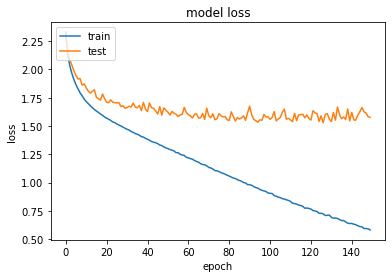

In [20]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [21]:
# Save model and weights
model_name = 'Emotion_Model_aug.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json_aug.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /home/vm/kaggle/saved_models/Emotion_Model_aug.h5 


In [23]:
# loading json and model architecture 
json_file = open('model_json_aug.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model_aug.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 48.15%


In [24]:
preds = loaded_model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

571/571 [==============================] - 17s 31ms/step


array([3, 5, 1, ..., 3, 3, 8])

In [25]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[170:180]



actualvalues  predictedvalues
170  female_surprise  female_surprise
171      female_fear      female_fear
172   female_neutral   female_neutral
173   female_neutral  female_surprise
174        male_fear        male_fear
175     male_disgust      female_fear
176      female_fear      female_fear
177   female_disgust   female_disgust
178     male_disgust     male_neutral
179        male_fear     female_happy

In [26]:
# Write out the predictions to disk
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

actualvalues
predictedvalues              
female_angry             1387
female_disgust           1060
female_fear               759
female_happy             1035
female_neutral            773
female_sad                776
female_surprise           362
male_angry                356
male_disgust              361
male_fear                 603
male_happy                467
male_neutral              626
male_sad                  462
male_surprise              95

0.4814733611050208


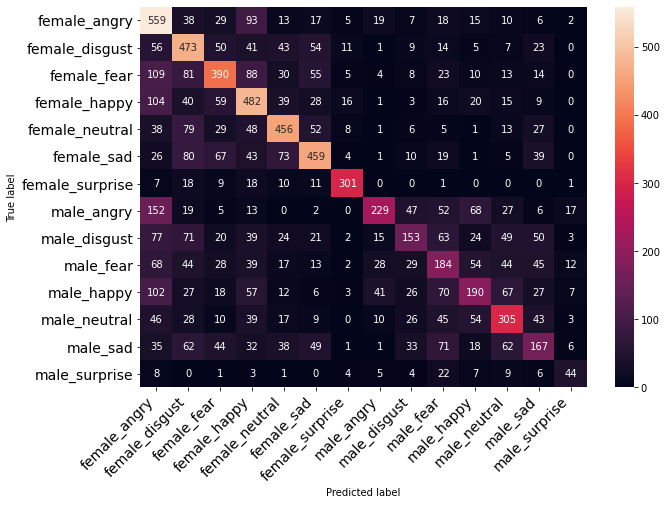

In [27]:
# Get the predictions file 
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)



In [28]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.40      0.67      0.50       831
 female_disgust       0.45      0.60      0.51       787
    female_fear       0.51      0.47      0.49       830
   female_happy       0.47      0.58      0.52       832
 female_neutral       0.59      0.60      0.59       763
     female_sad       0.59      0.56      0.57       827
female_surprise       0.83      0.80      0.82       376
     male_angry       0.64      0.36      0.46       637
   male_disgust       0.42      0.25      0.31       611
      male_fear       0.31      0.30      0.30       607
     male_happy       0.41      0.29      0.34       653
   male_neutral       0.49      0.48      0.48       635
       male_sad       0.36      0.27      0.31       619
  male_surprise       0.46      0.39      0.42       114

       accuracy                           0.48      9122
      macro avg       0.50      0.47      0.47      9122
   weighted avg       0.49   

0.812541109405832


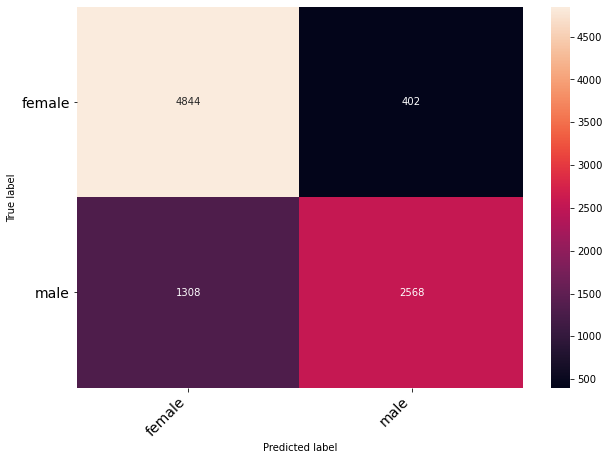

In [29]:
modidf = finaldf
modidf['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)


In [30]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

      female       0.79      0.92      0.85      5246
        male       0.86      0.66      0.75      3876

    accuracy                           0.81      9122
   macro avg       0.83      0.79      0.80      9122
weighted avg       0.82      0.81      0.81      9122



0.5365051523788643


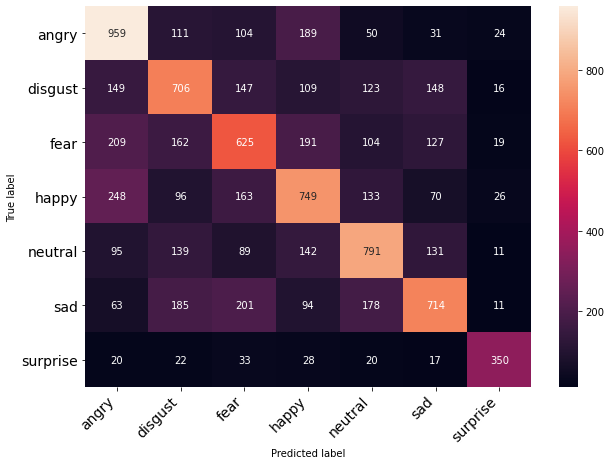

In [31]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique() 
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [32]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.55      0.65      0.60      1468
     disgust       0.50      0.51      0.50      1398
        fear       0.46      0.43      0.45      1437
       happy       0.50      0.50      0.50      1485
     neutral       0.57      0.57      0.57      1398
         sad       0.58      0.49      0.53      1446
    surprise       0.77      0.71      0.74       490

    accuracy                           0.54      9122
   macro avg       0.56      0.55      0.55      9122
weighted avg       0.54      0.54      0.54      9122



In [2]:
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Convolution2D, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Other  
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import sys
import IPython.display as ipd  # To play sound in the notebook
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [3]:
'''
1. Data Augmentation method   
'''
def speedNpitch(data):
    """
    Speed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.2  / length_change # try changing 1.0 to 2.0 ... =D
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

'''
2. Extracting the MFCC feature as an image (Matrix format).  
'''
def prepare_data(df, n, aug, mfcc):
    X = np.empty(shape=(df.shape[0], n, 216, 1))
    input_length = sampling_rate * audio_duration
    
    cnt = 0
    for fname in tqdm(df.path):
        file_path = fname
        data, _ = librosa.load(file_path, sr=sampling_rate
                               ,res_type="kaiser_fast"
                               ,duration=2.5
                               ,offset=0.5
                              )

        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, int(input_length) - len(data) - offset), "constant")

        # Augmentation? 
        if aug == 1:
            data = speedNpitch(data)
        
        # which feature?
        if mfcc == 1:
            # MFCC extraction 
            MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
            MFCC = np.expand_dims(MFCC, axis=-1)
            X[cnt,] = MFCC
            
        else:
            # Log-melspectogram
            melspec = librosa.feature.melspectrogram(data, n_mels = n_melspec)   
            logspec = librosa.amplitude_to_db(melspec)
            logspec = np.expand_dims(logspec, axis=-1)
            X[cnt,] = logspec
            
        cnt += 1
    
    return X


'''
3. Confusion matrix plot 
'''        
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    '''Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    '''
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
    
'''
# 4. Create the 2D CNN model 
'''
def get_2d_conv_model(n):
    ''' Create a standard deep 2D convolutional neural network'''
    nclass = 14
    inp = Input(shape=(n,216,1))  #2D matrix of 30 MFCC bands by 216 audio length.
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    out = Dense(nclass, activation=softmax)(x)
    model = models.Model(inputs=inp, outputs=out)
    
    opt = optimizers.Adam(0.001)
    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    return model

'''
# 5. Other functions 
'''
class get_results:
    '''
    We're going to create a class (blueprint template) for generating the results based on the various model approaches. 
    So instead of repeating the functions each time, we assign the results into on object with its associated variables 
    depending on each combination:
        1) MFCC with no augmentation  
        2) MFCC with augmentation 
        3) Logmelspec with no augmentation 
        4) Logmelspec with augmentation
    '''
    
    def __init__(self, model_history, model ,X_test, y_test, labels):
        self.model_history = model_history
        self.model = model
        self.X_test = X_test
        self.y_test = y_test             
        self.labels = labels

    def create_plot(self, model_history):
        '''Check the logloss of both train and validation, make sure they are close and have plateau'''
        plt.plot(model_history.history['loss'])
        plt.plot(model_history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

    def create_results(self, model):
        '''predict on test set and get accuracy results'''
        opt = optimizers.Adam(0.001)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        score = model.evaluate(X_test, y_test, verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

    def confusion_results(self, X_test, y_test, labels, model):
        '''plot confusion matrix results'''
        preds = model.predict(X_test, 
                                 batch_size=16, 
                                 verbose=2)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))

        classes = labels
        classes.sort()    

        c = confusion_matrix(actual, preds)
        print_confusion_matrix(c, class_names = classes)
    
    def accuracy_results_gender(self, X_test, y_test, labels, model):
        '''Print out the accuracy score and confusion matrix heat map of the Gender classification results'''
    
        preds = model.predict(X_test, 
                         batch_size=16, 
                         verbose=2)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))
        
        # print(accuracy_score(actual, preds))
        
        actual = pd.DataFrame(actual).replace({'female_angry':'female'
                   , 'female_disgust':'female'
                   , 'female_fear':'female'
                   , 'female_happy':'female'
                   , 'female_sad':'female'
                   , 'female_surprise':'female'
                   , 'female_neutral':'female'
                   , 'male_angry':'male'
                   , 'male_fear':'male'
                   , 'male_happy':'male'
                   , 'male_sad':'male'
                   , 'male_surprise':'male'
                   , 'male_neutral':'male'
                   , 'male_disgust':'male'
                  })
        preds = pd.DataFrame(preds).replace({'female_angry':'female'
               , 'female_disgust':'female'
               , 'female_fear':'female'
               , 'female_happy':'female'
               , 'female_sad':'female'
               , 'female_surprise':'female'
               , 'female_neutral':'female'
               , 'male_angry':'male'
               , 'male_fear':'male'
               , 'male_happy':'male'
               , 'male_sad':'male'
               , 'male_surprise':'male'
               , 'male_neutral':'male'
               , 'male_disgust':'male'
              })

        classes = actual.loc[:,0].unique() 
        classes.sort()    

        c = confusion_matrix(actual, preds)
        print(accuracy_score(actual, preds))
        print_confusion_matrix(c, class_names = classes)

In [4]:
ref = pd.read_csv("/home/vm/kaggle/input/data-path/Data_path.csv")
ref.head()


labels source                                        path
0  male_disgust  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/DC_d13.wav
1    male_happy  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/KL_h03.wav
2  male_neutral  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/KL_n15.wav
3     male_fear  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/DC_f07.wav
4    male_happy  SAVEE  /home/vm/kaggle/input/SAVEE/ALL/JE_h03.wav

In [5]:
sampling_rate=44100
audio_duration=2.5
n_mfcc = 30
mfcc = prepare_data(ref, n = n_mfcc, aug = 0, mfcc = 1)

100%|██████████| 12162/12162 [05:42<00:00, 35.52it/s]


In [8]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(mfcc
                                                    , ref.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )


# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

# Normalization over frequency axis *** I changed this bit to get better accuracy with data augmentation ***
def fit_X_scaler(X_train):
    """fit StandardScaler，and return StandardScaler object
    """
    sc = StandardScaler()
    for _, clips in enumerate(X_train):
        data_i_truncated = np.squeeze(clips)
        sc.partial_fit(data_i_truncated)
    return sc

def get_X_scaled(X_train, scaler=None):
    """apply normlization
    """
    X_train_new = np.zeros(X_train.shape)
    for indx, clips in enumerate(X_train):
        data_i_truncated = np.squeeze(clips)
        if scaler is not None:  # normlize
            data_i_truncated = scaler.transform(data_i_truncated)
        X_train[indx, :, :, 0] = data_i_truncated
    return X_train

sc = fit_X_scaler(X_train)
X_train = get_X_scaled(X_train, sc)
X_test = get_X_scaled(X_test, sc)

# Build CNN model 
model = get_2d_conv_model(n=n_mfcc)
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    batch_size=16, verbose = 2, epochs=50)

Epoch 1/50
571/571 - 73s - loss: 2.3894 - acc: 0.2064 - val_loss: 2.6457 - val_acc: 0.1430
Epoch 2/50
571/571 - 74s - loss: 1.9132 - acc: 0.3473 - val_loss: 1.7132 - val_acc: 0.4064
Epoch 3/50
571/571 - 74s - loss: 1.6629 - acc: 0.4159 - val_loss: 1.6488 - val_acc: 0.4087
Epoch 4/50
571/571 - 74s - loss: 1.5523 - acc: 0.4503 - val_loss: 1.3661 - val_acc: 0.5242
Epoch 5/50
571/571 - 72s - loss: 1.4778 - acc: 0.4811 - val_loss: 1.7402 - val_acc: 0.3742
Epoch 6/50
571/571 - 71s - loss: 1.4216 - acc: 0.4916 - val_loss: 1.4725 - val_acc: 0.4788
Epoch 7/50
571/571 - 71s - loss: 1.3689 - acc: 0.5131 - val_loss: 1.3503 - val_acc: 0.5051
Epoch 8/50
571/571 - 71s - loss: 1.3341 - acc: 0.5257 - val_loss: 1.8574 - val_acc: 0.3818
Epoch 9/50
571/571 - 71s - loss: 1.3135 - acc: 0.5229 - val_loss: 1.1105 - val_acc: 0.5847
Epoch 10/50
571/571 - 77s - loss: 1.2852 - acc: 0.5365 - val_loss: 1.2855 - val_acc: 0.5344
Epoch 11/50
571/571 - 73s - loss: 1.2453 - acc: 0.5522 - val_loss: 1.1541 - val_acc: 0.58

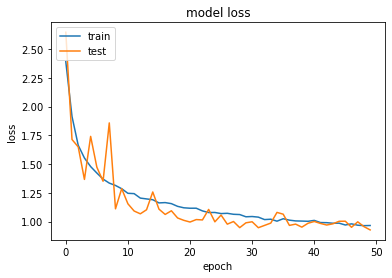

accuracy: 66.00%
191/191 - 6s


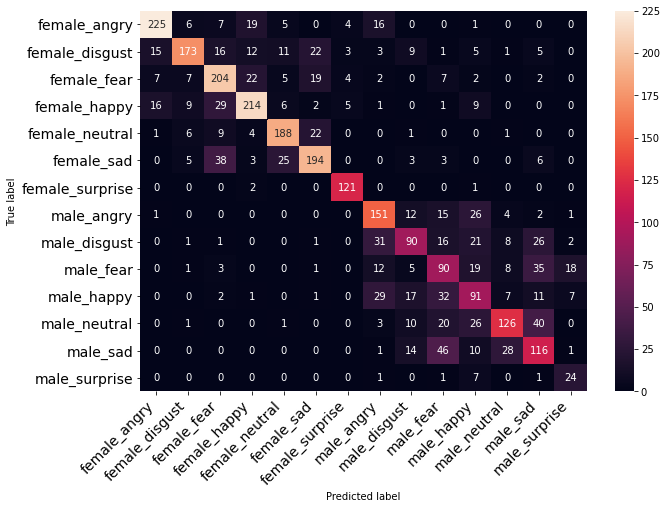

In [9]:
results = get_results(model_history,model,X_test,y_test, ref.labels.unique())
results.create_plot(model_history)
results.create_results(model)
results.confusion_results(X_test, y_test, ref.labels.unique(), model)
